In [5]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=df03efc3ab9a92ee5ae2bbb609f2456d10ebf3e8676e4d2bc39a163c58e0b7ef
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import scipy.stats as st
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from ydata_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
sns.set(color_codes = True)
sns.set_palette(palette = 'mako', n_colors = 8)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
data = pd.read_csv("/content/drive/MyDrive/german_credit_data.csv")
df1=data.copy()
df1

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
df1.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [10]:
df1.shape

(1000, 11)

In [11]:
def check_df(df1: object, head: object = 5) -> object:
    print("\nShape")
    print(df1.shape)
    print("\nTypes")
    print(df1.dtypes)
    print("\nNANs")
    print(df1.isnull().sum())
    print("\nInfo")
    print(df1.info())
check_df(df1)


Shape
(1000, 11)

Types
Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

NANs
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   

In [12]:
print('Number of duplicated rows: ' , len(df1[df1.duplicated()]))

Number of duplicated rows:  0


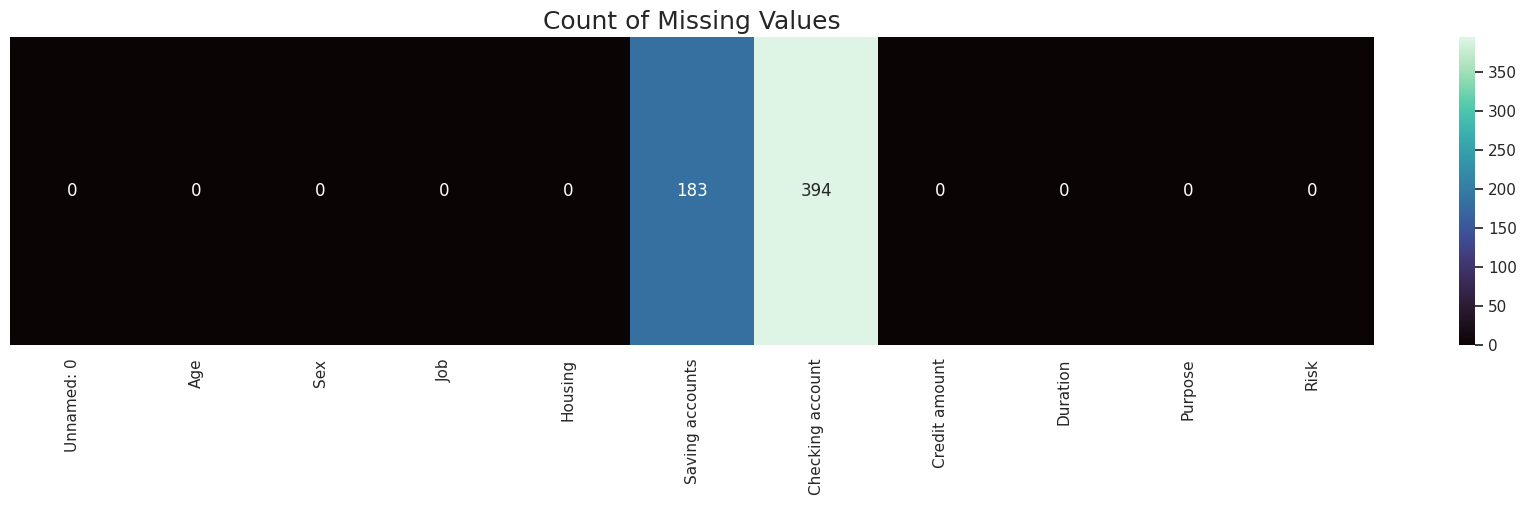

In [13]:
plt.figure(figsize=(22,4))
sns.heatmap((df1.isna().sum()).to_frame(name='').T,cmap='mako', annot=True,
             fmt='0.0f').set_title('Count of Missing Values', fontsize=18)
plt.show()

In [14]:
df1[df1['Age'].isnull()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [15]:
df1[df1['Age'].isnull()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [16]:
df1[df1['Checking account'].isnull()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
2,2,49,male,1,own,little,NaN,2096,12,education,good
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...,...
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
991,991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
994,994,50,male,2,own,NaN,NaN,2390,12,car,good
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good


In [17]:
df1[df1['Saving accounts'].isnull()]

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
16,16,53,male,2,own,NaN,NaN,2424,24,radio/TV,good
17,17,25,male,2,own,NaN,little,8072,30,business,good
24,24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...,...,...
968,968,29,male,2,rent,NaN,NaN,7166,42,radio/TV,good
977,977,42,male,2,own,NaN,moderate,2427,18,business,good
990,990,37,male,1,own,NaN,NaN,3565,12,education,good
992,992,23,male,1,rent,NaN,little,1936,18,radio/TV,good


In [18]:
df1.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [20]:
df1[df1['Credit amount'].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [21]:
df1[df1['Purpose'].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [22]:
df1[df1['Housing'].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [23]:
df1[df1['Duration'].isnull()]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk


In [24]:
# Remove columns whose null values are less than 10
df1.dropna(subset=['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount'],inplace=True)

In [25]:
df1[df1.columns[df1.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [26]:
df1['Credit amount']=df1['Credit amount'].fillna(df1['Credit amount'].median())

In [27]:
df1.describe()[1:].T.style.background_gradient(cmap='mako', axis=1)

,mean,std,min,25%,50%,75%,max
Age,34.888889,11.787918,19.000000,26.000000,31.500000,41.000000,75.000000
Job,1.875479,0.682811,0.000000,2.000000,2.000000,2.000000,3.000000
Credit amount,3278.745211,2929.155177,276.000000,1297.500000,2326.500000,3971.250000,18424.000000
Duration,21.339080,12.474079,6.000000,12.000000,18.000000,26.750000,72.000000


In [28]:
# finding unique data
df1.apply(lambda x: len(x.unique()))

Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [29]:
unique = df1.nunique().sort_values()
unique_values = df1.apply(lambda x: x.unique())
pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

,Number of Unique Values,Unique Values
Age,52,"[22, 45, 53, 35, 28, 25, 24, 60, 32, 44, 48, 3..."
Checking account,3,"[moderate, little, rich]"
Credit amount,503,"[5951, 7882, 4870, 6948, 5234, 1295, 4308, 156..."
Duration,30,"[48, 42, 24, 36, 30, 12, 15, 6, 10, 7, 60, 18,..."
Housing,3,"[own, free, rent]"
Job,4,"[2, 3, 1, 0]"
Purpose,8,"[radio/TV, furniture/equipment, car, business,..."
Risk,2,"[bad, good]"
Saving accounts,4,"[little, moderate, quite rich, rich]"
Sex,2,"[female, male]"


In [30]:
ProfileReport(df1, title='Credit Card Dataset Report', minimal=True, progress_bar=False, samples=None, correlations=None, interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#583101'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

In [31]:
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [32]:
df2 = ['Age','Credit amount','Duration']

In [33]:
df1[df2].corr().T.style.background_gradient(cmap='mako', axis=1)

,Age,Credit amount,Duration
Age,1.000000,0.082014,0.001549
Credit amount,0.082014,1.000000,0.613298
Duration,0.001549,0.613298,1.000000


The chart produced by the code is a correlation matrix with a background gradient applied to enhance visual interpretation. The correlation matrix is a square table that shows the correlation coefficients between pairs of variables in the dataset. These coefficients range from -1 to 1, indicating the strength and direction of the linear relationship between variables. A coefficient of 1 signifies a perfect positive correlation, -1 signifies a perfect negative correlation, and 0 indicates no correlation. The matrix helps identify how closely related the variables are to each other.

The background gradient applied to the correlation matrix uses the 'mako' colormap to visually differentiate the strength of the correlations. Higher positive correlations are represented with one color intensity, while higher negative correlations are represented with another, making it easy to quickly spot strong relationships. This visual tool is particularly useful for identifying patterns, clusters, or anomalies within the dataset, and it enhances the interpretability of the data by leveraging color gradients to represent numerical values intuitively.

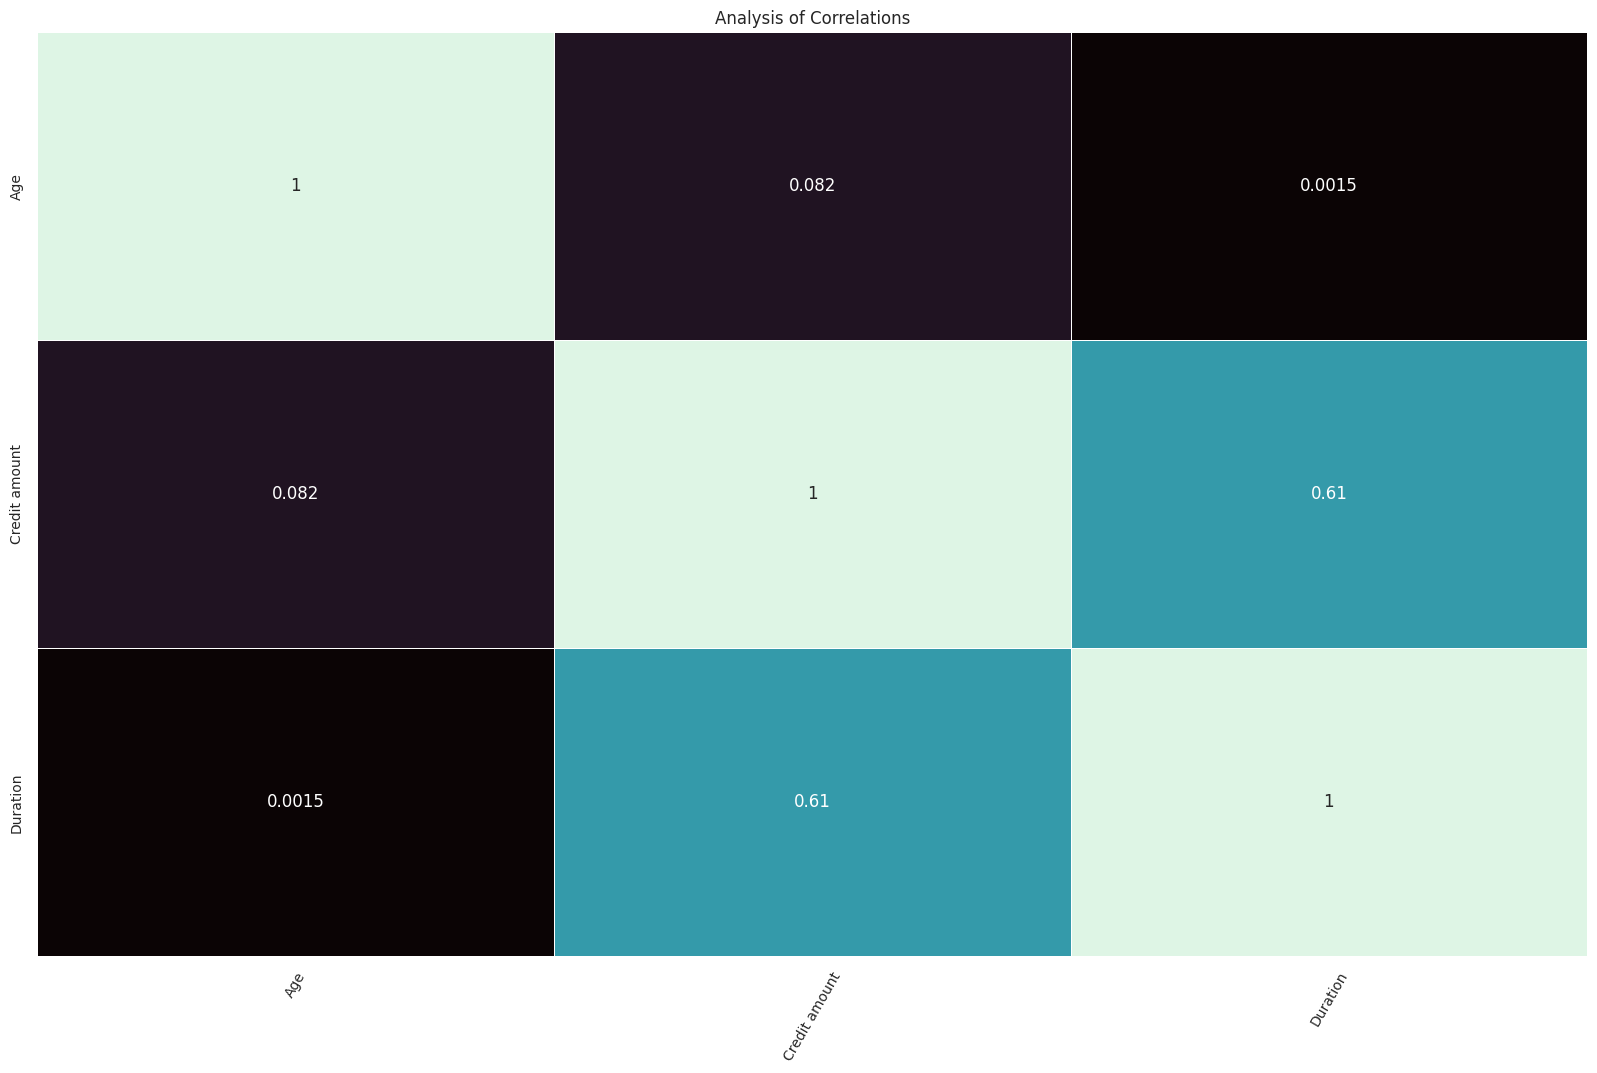

In [34]:
def correlated_map(dataframe, plot=False):
    corr = df1[df2].corr()
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="mako", annot=True, linewidths=.6 , cbar = False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=12)
        plt.show()
correlated_map(df1, plot=True)


The correlated_map function is designed to compute and optionally visualize the correlation matrix of specified columns within a DataFrame. By passing the DataFrame and a list of columns to the function, it calculates the pairwise correlations between these columns, which quantify the strength and direction of their linear relationships. The function's core capability is to produce a correlation matrix, which is a table showing correlation coefficients ranging from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

If the plot parameter is set to True, the function creates a heatmap to visually represent the correlation matrix using Seaborn's heatmap function. The heatmap uses the 'mako' colormap and includes annotations of the correlation values for clarity. It also customizes the figure size, tick labels, and adds a title, enhancing readability and interpretability. This visualization makes it easier to identify patterns, such as strong positive or negative correlations, within the dataset. The heatmap is particularly useful for quickly spotting relationships and dependencies between variables.

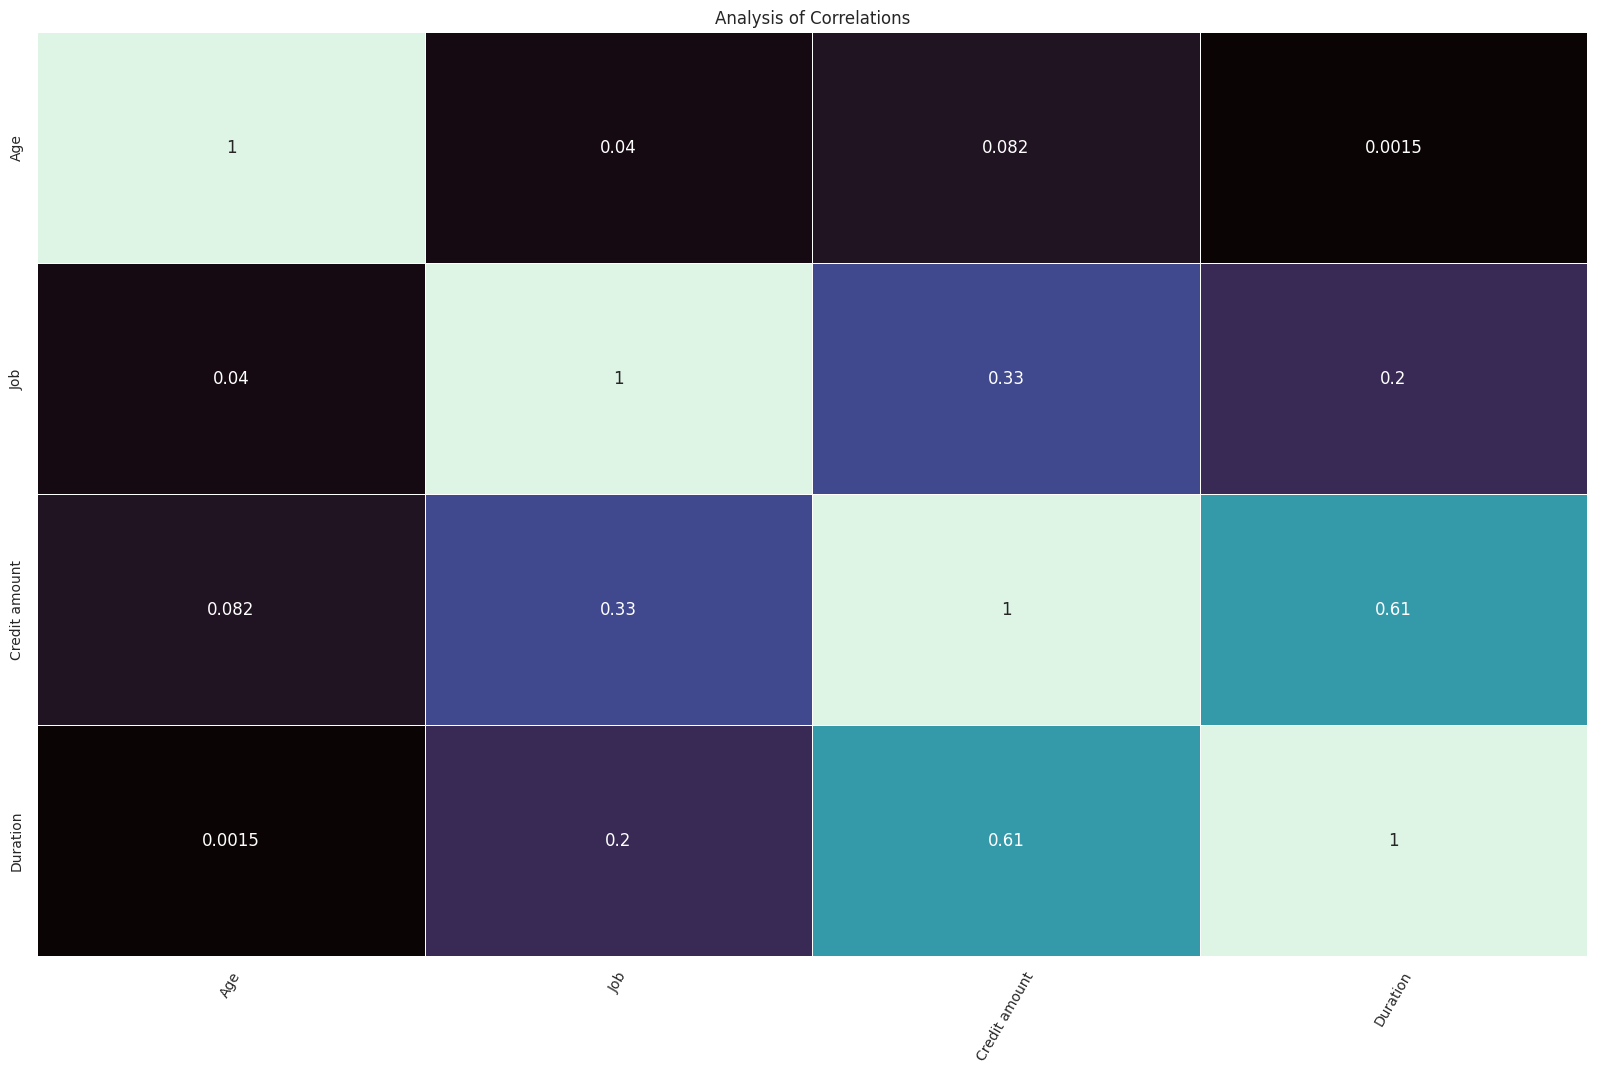

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


In [35]:
def correlated_map(dataframe, columns=None, plot=False):
    if columns is None:
        columns = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()

    corr = dataframe[columns].corr()

    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, cmap="mako", annot=True, linewidths=0.6, cbar=False)
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Analysis of Correlations', size=12)
        plt.show()

    return corr

# Example usage:
# Assuming df1 is your DataFrame and you want to analyze correlation between numeric columns
correlated_map(df1, plot=True)


The provided code snippet generates a triangular correlation heatmap with specific enhancements to highlight significant correlations between variables. It starts by calculating the correlation matrix corr for the specified columns in the DataFrame df, and then creates a mask using np.triu to display only the lower triangle of the correlation matrix. This mask ensures that the upper triangle is hidden, making the heatmap easier to read. Additionally, a cut-off threshold is applied to mask out correlations with an absolute value less than 0.25, focusing only on more substantial correlations.

To further enhance the visualization, the code includes three extreme thresholds (extreme_1, extreme_2, extreme_3) to annotate significant correlation values with asterisks. Correlations exceeding these thresholds are marked with one, two, or three asterisks, respectively, allowing for quick identification of strong relationships. This step involves creating a list of formatted annotation strings, where each correlation value is rounded to four decimal places and appropriately annotated based on its significance.

The heatmap is then plotted using Seaborn's heatmap function, with the annotated correlation matrix and a custom colormap ('mako'). The figure is customized with a specific size, and the heatmap is titled "Triangle Correlation Heatmap" for clarity. An optional step to remove empty rows and columns ensures that only relevant parts of the matrix are displayed, enhancing the visual focus on meaningful data. The result is a clear, informative heatmap that effectively highlights significant correlations, making it a useful tool for data analysis and interpretatio

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


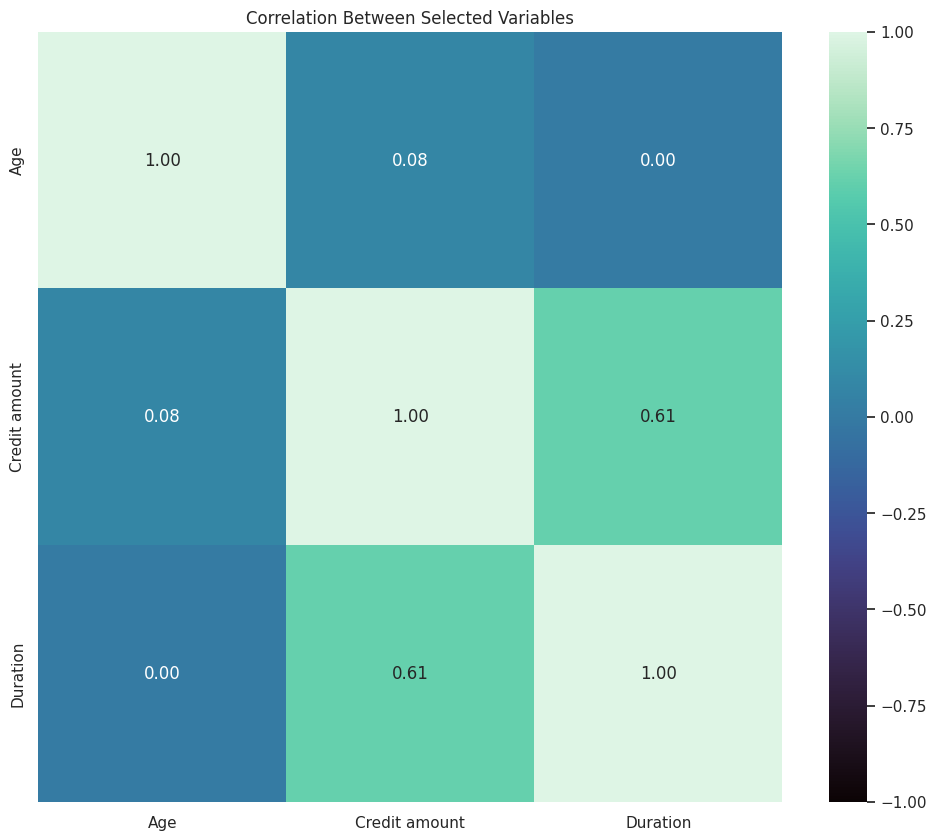

In [38]:
# Define the columns of interest based on the provided descriptions
sel = ['Age', 'Credit amount', 'Duration']

# Create a DataFrame with selected columns
df1_sel = df1[['Age', 'Credit amount', 'Duration']]
# Mapping categorical variables to numeric values if needed
# Example: df1_sel['Checking account'] = df1_sel['Checking account'].map({'moderate': 2, 'little': 1, 'rich': 3})
#          df1_sel['Risk'] = df1_sel['Risk'].map({'bad': 0, 'good': 1})
#          df1_sel['Sex'] = df1_sel['Sex'].map({'female': 0, 'male': 1})

# Create a correlation matrix
corr = df1_sel.corr() # Use the correct DataFrame name 'df1_sel'

# Plotting the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='mako', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Between Selected Variables')
plt.show()

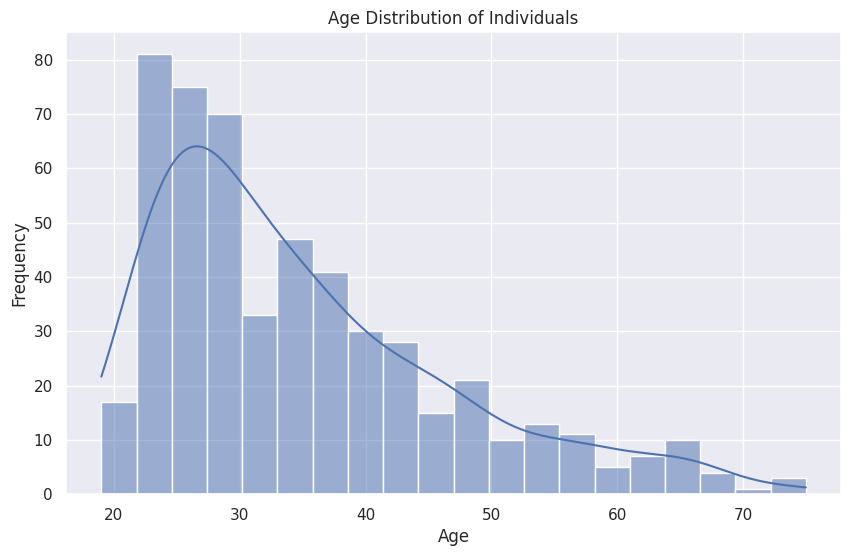

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df1['Age'], kde=True, bins=20)
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Shows how ages are distributed among individuals, helping identify common age groups.

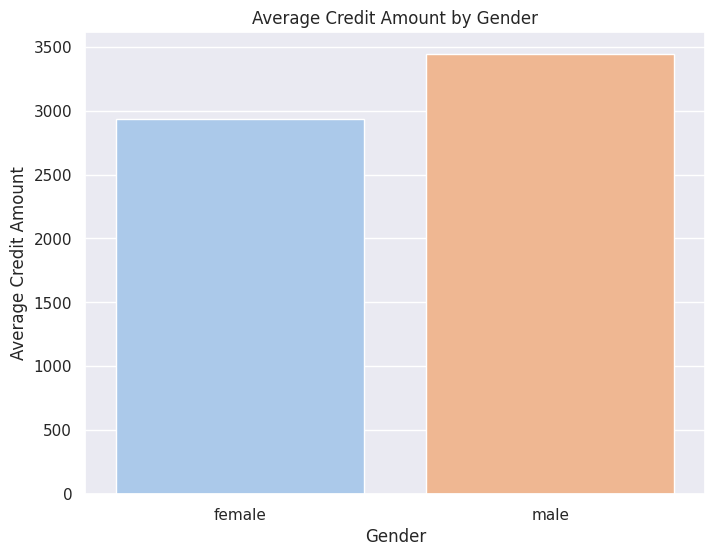

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute the average credit amount by gender
average_credit_by_gender = df1.groupby('Sex')['Credit amount'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Credit amount', data=average_credit_by_gender, palette='pastel')
plt.title('Average Credit Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Credit Amount')
plt.show()


Data Aggregation: df.groupby('Sex')['Credit amount'].mean().reset_index() groups the data by gender and calculates the average credit amount for each gender.
Plot: sns.barplot() creates a bar plot where the x-axis represents gender, and the y-axis represents the average credit amount. The palette='pastel' argument sets a color palette for better visualization.


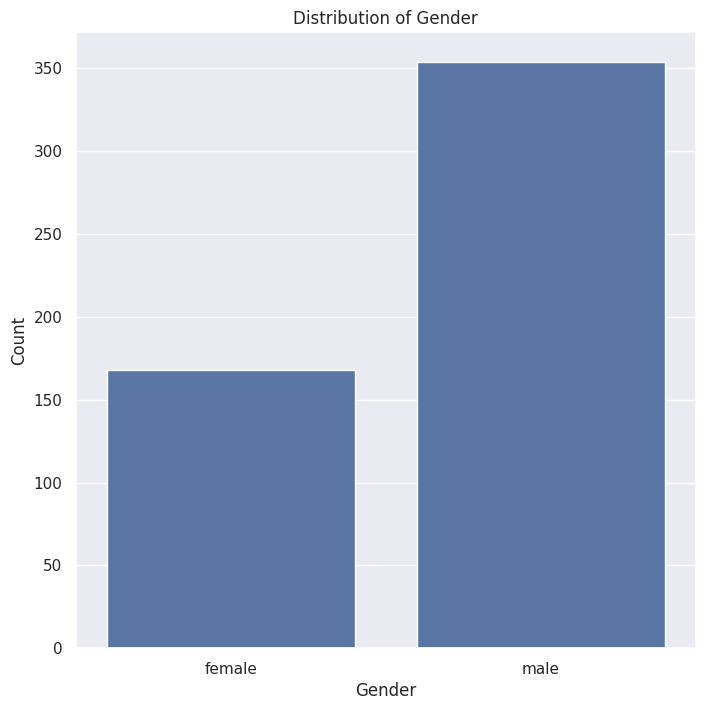

In [47]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Sex', data=df1)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Analyze the gender distribution in the dataset.

In [50]:
df1

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


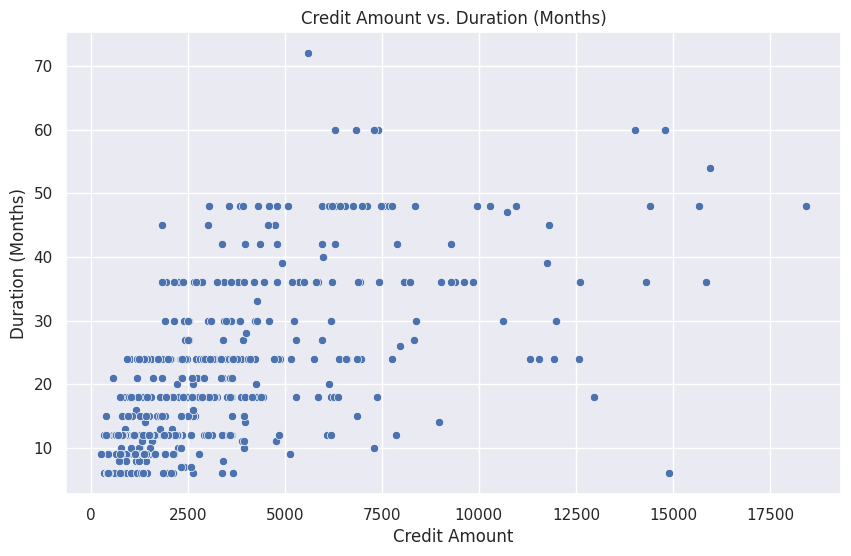

In [52]:

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Credit amount', y='Duration', data=df1)
plt.title('Credit Amount vs. Duration (Months)')
plt.xlabel('Credit Amount')
plt.ylabel('Duration (Months)')
plt.show()


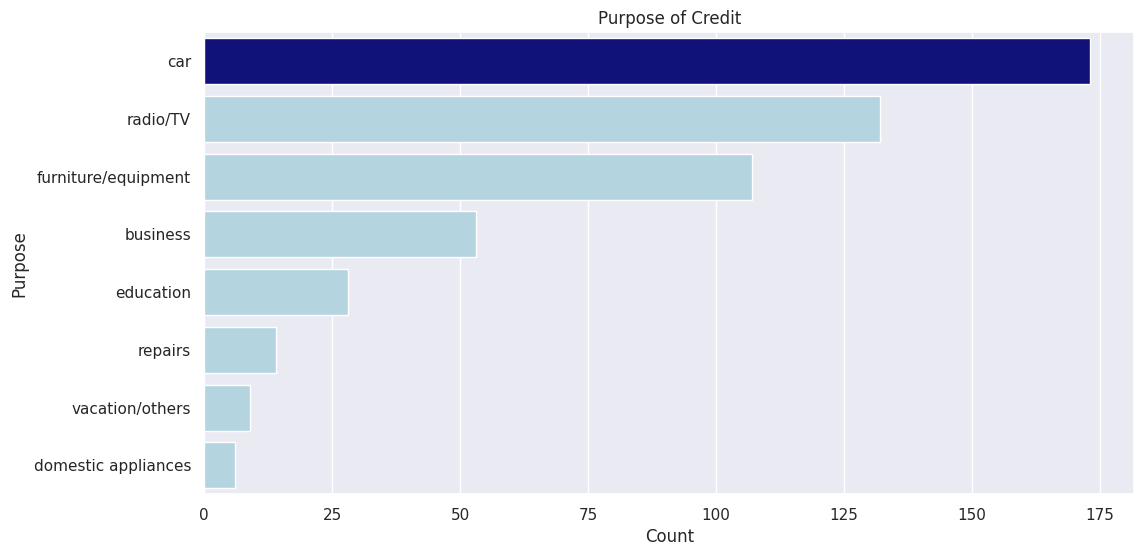

In [58]:
most_common_purpose = df1['Purpose'].value_counts().index[0]

# Define a color palette where the most common purpose is darker
palette = {purpose: 'darkblue' if purpose == most_common_purpose else 'lightblue'
           for purpose in df1['Purpose'].value_counts().index}

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(y='Purpose', data=df1, order=df1['Purpose'].value_counts().index, palette=palette)
plt.title('Purpose of Credit')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

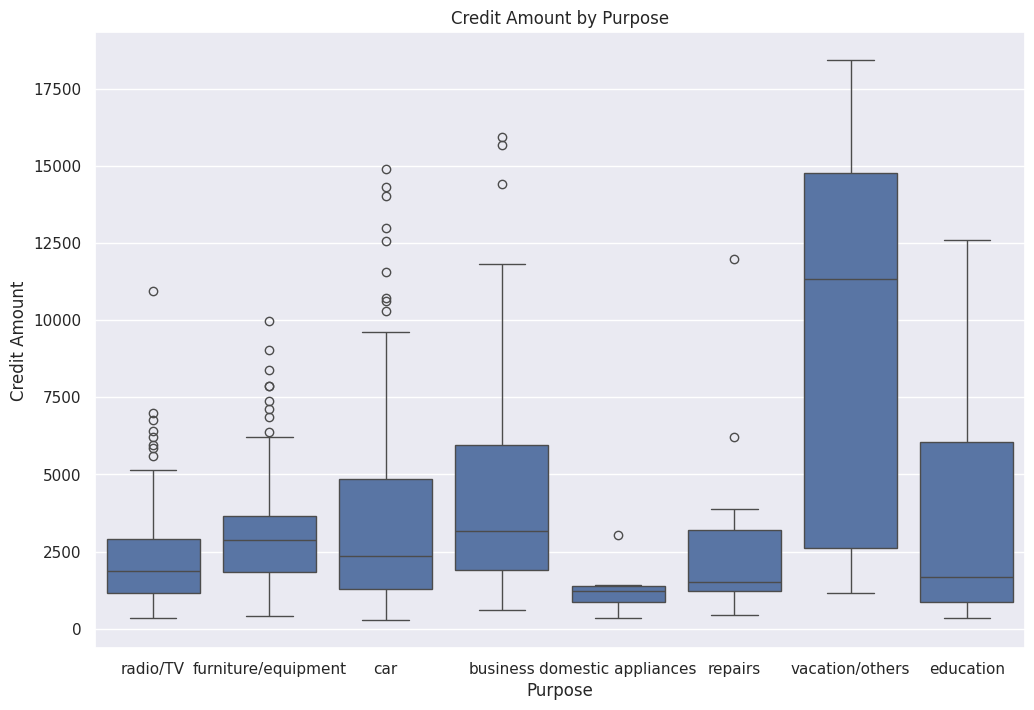

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Purpose', y='Credit amount', data=df1)
plt.title('Credit Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Credit Amount')
plt.show()

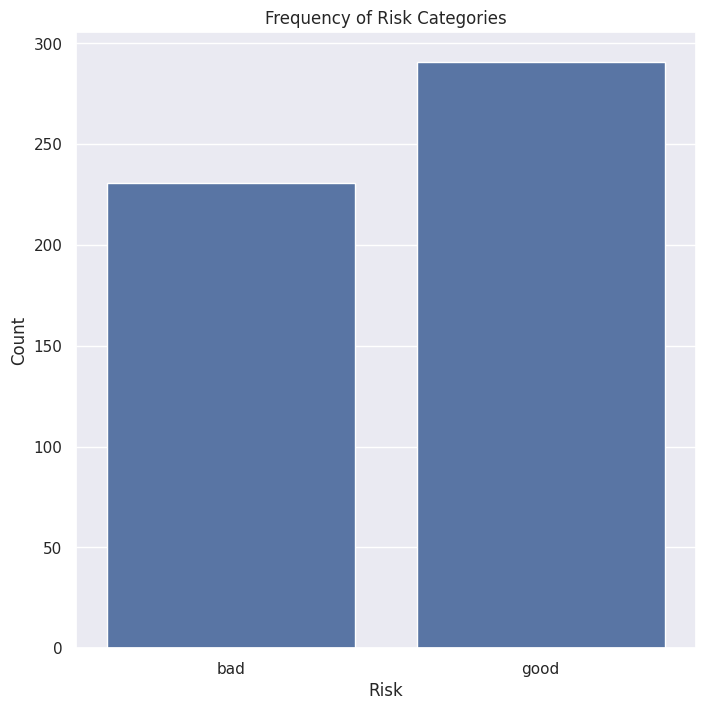

In [61]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Risk', data=df1)
plt.title('Frequency of Risk Categories')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

<Figure size 1200x1000 with 0 Axes>

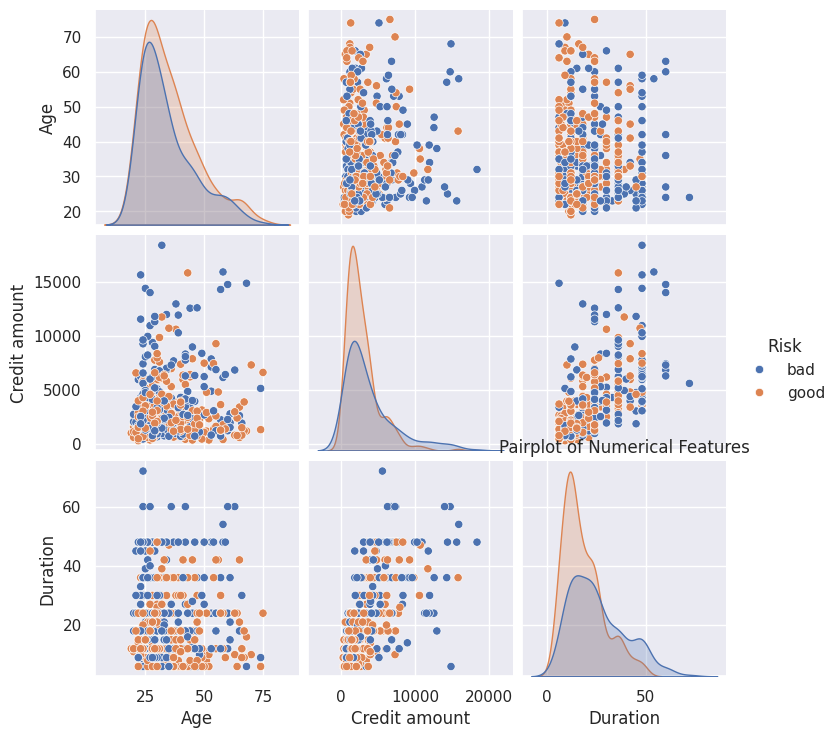

In [63]:
plt.figure(figsize=(12, 10))
sns.pairplot(df1[['Age', 'Credit amount', 'Duration', 'Risk']], hue='Risk')
plt.title('Pairplot of Numerical Features')
plt.show()

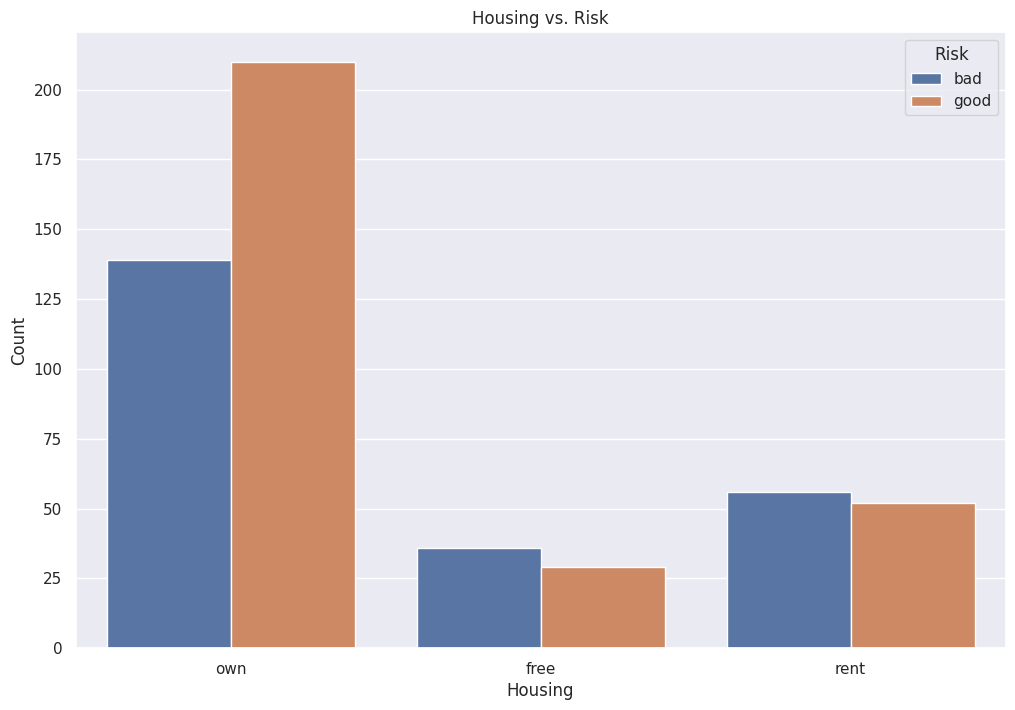

In [64]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Housing', hue='Risk', data=df1)
plt.title('Housing vs. Risk')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

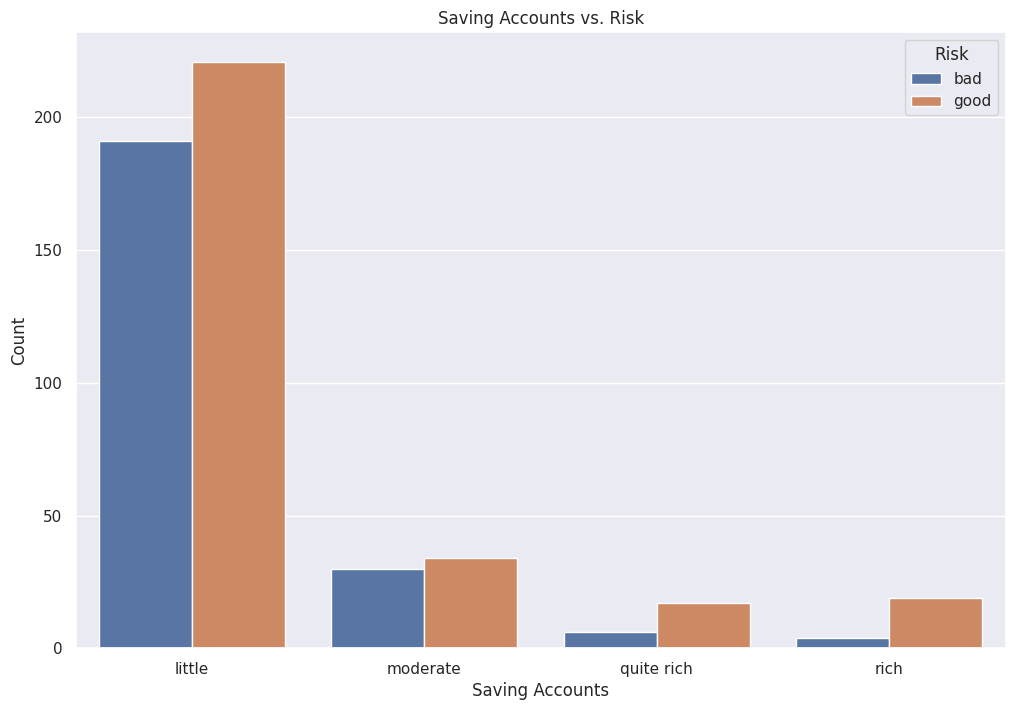

In [65]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Saving accounts', hue='Risk', data=df1)
plt.title('Saving Accounts vs. Risk')
plt.xlabel('Saving Accounts')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

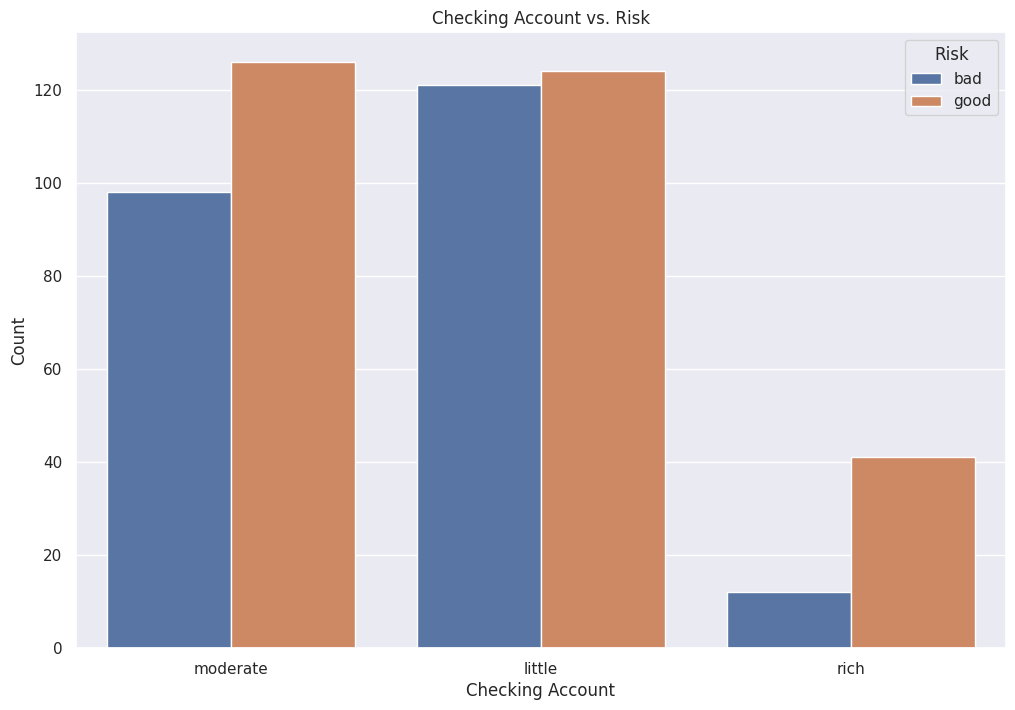

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Checking account', hue='Risk', data=df1)
plt.title('Checking Account vs. Risk')
plt.xlabel('Checking Account')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

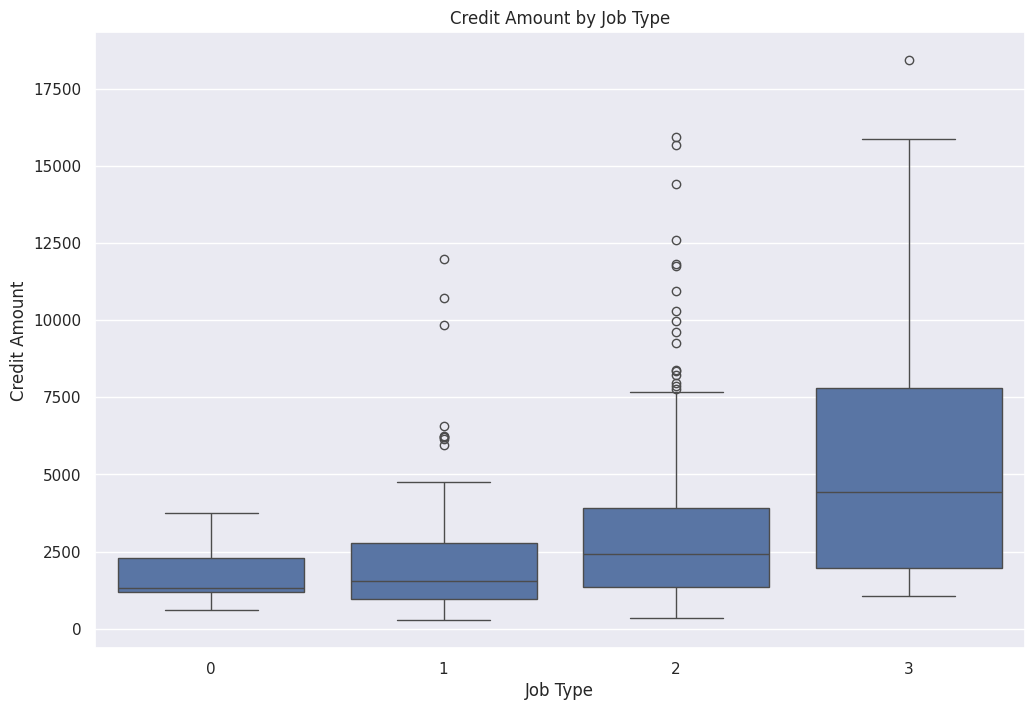

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job', y='Credit amount', data=df1)
plt.title('Credit Amount by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Credit Amount')
plt.show()

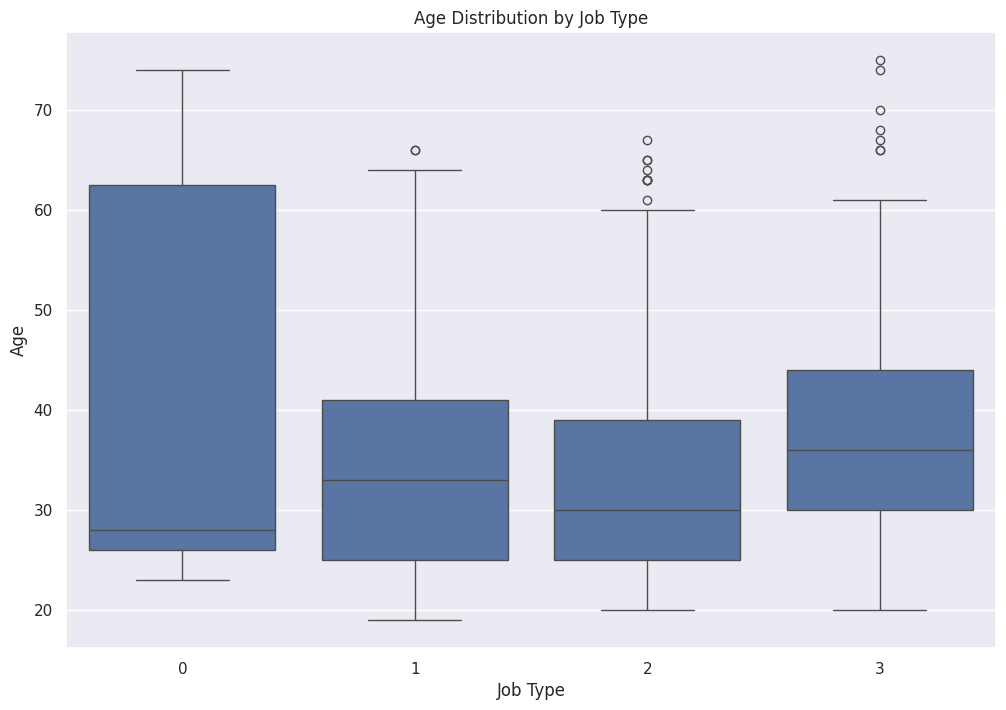

In [70]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Job', y='Age', data=df1)
plt.title('Age Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Age')
plt.show()

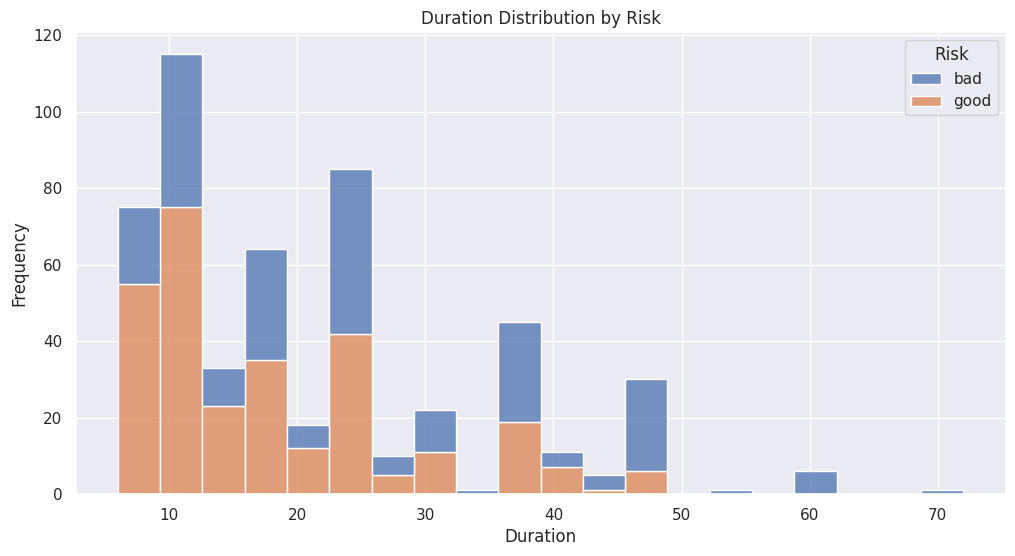

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Duration', hue='Risk', multiple='stack', bins=20)
plt.title('Duration Distribution by Risk')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

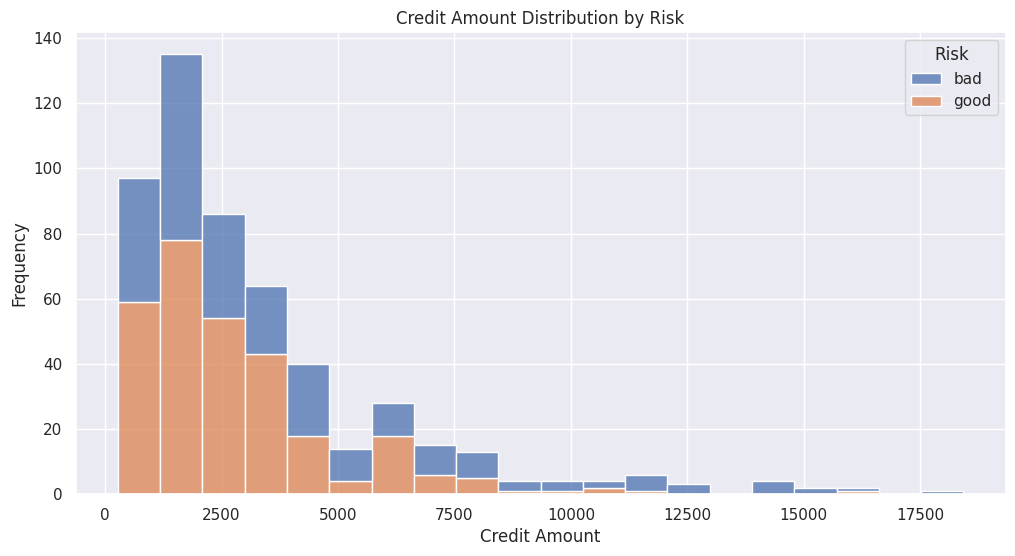

In [72]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Credit amount', hue='Risk', multiple='stack', bins=20)
plt.title('Credit Amount Distribution by Risk')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

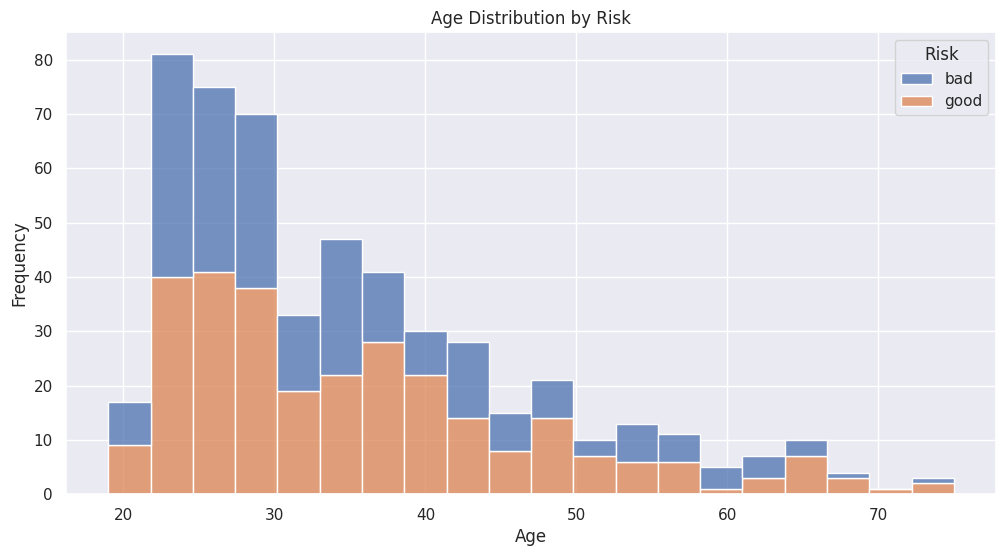

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df1, x='Age', hue='Risk', multiple='stack', bins=20)
plt.title('Age Distribution by Risk')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

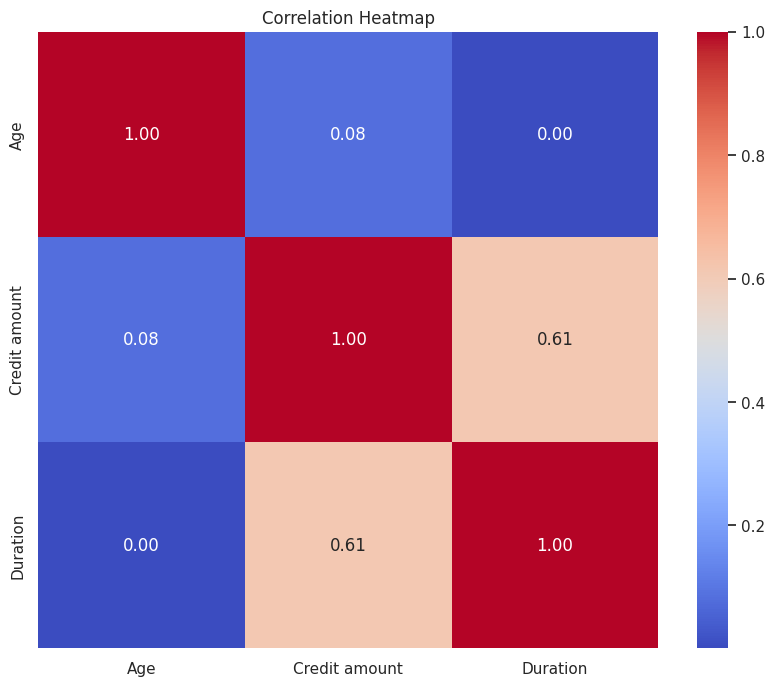

In [75]:
plt.figure(figsize=(10, 8))
corr = df1[['Age', 'Credit amount', 'Duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

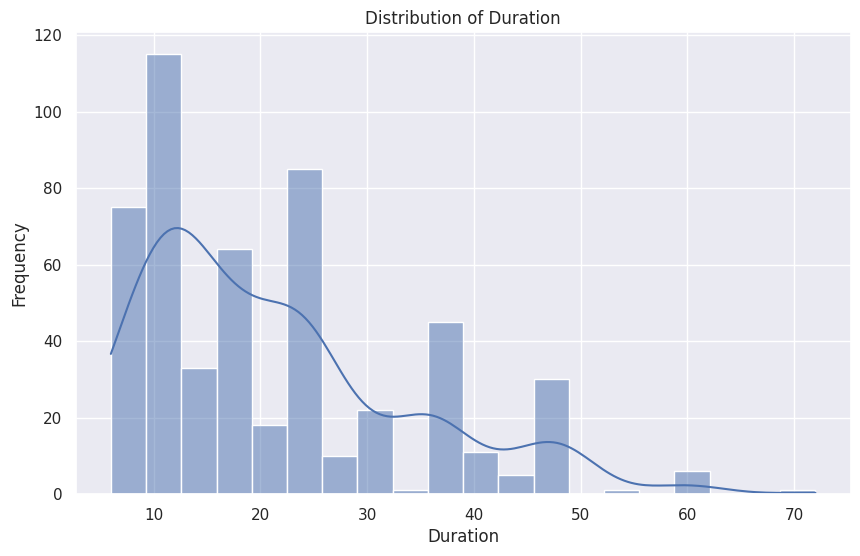

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Duration'], kde=True, bins=20)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

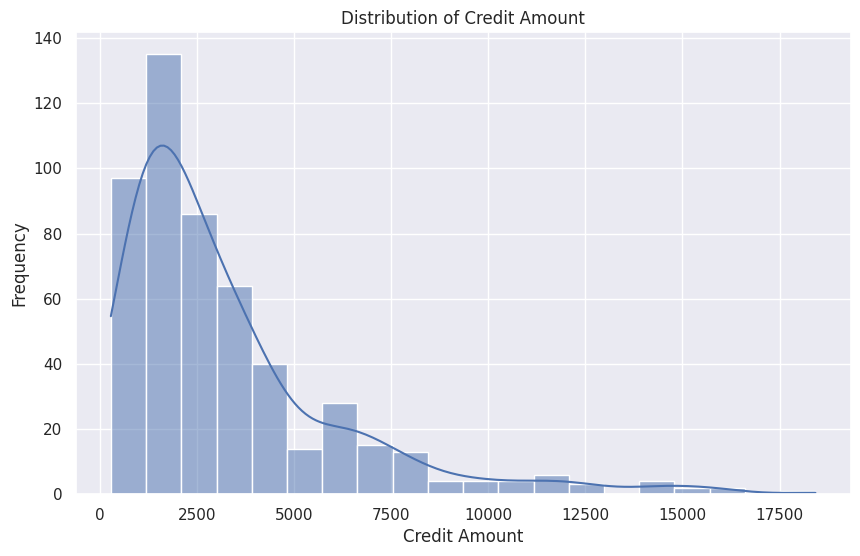

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['Credit amount'], kde=True, bins=20)
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

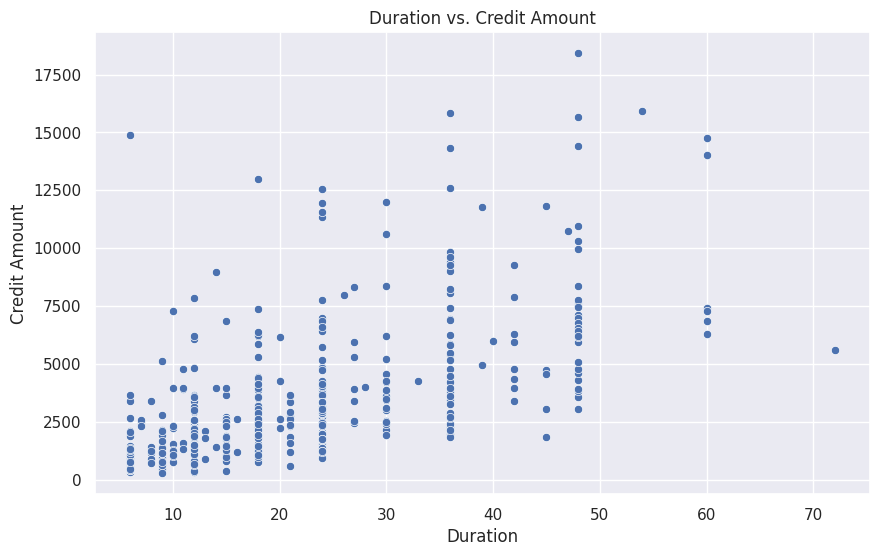

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Credit amount', data=df1)
plt.title('Duration vs. Credit Amount')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

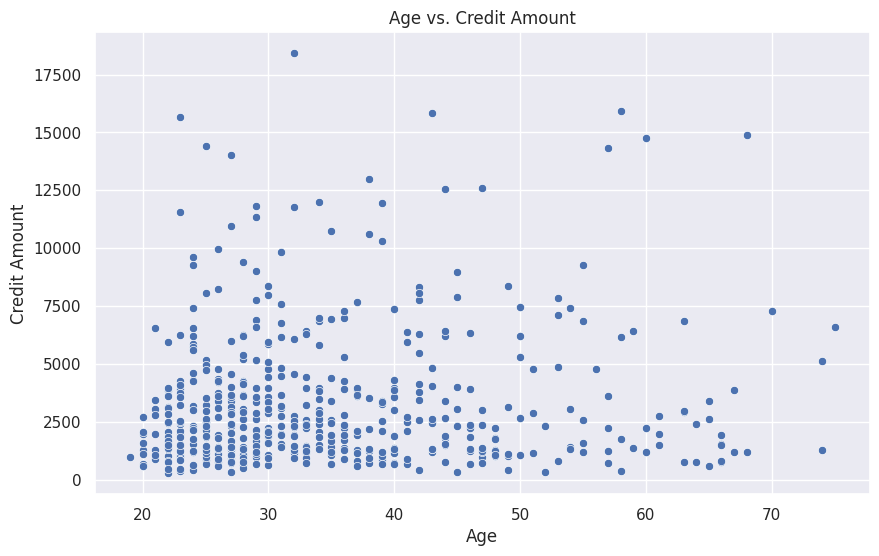

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Credit amount', data=df1)
plt.title('Age vs. Credit Amount')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()

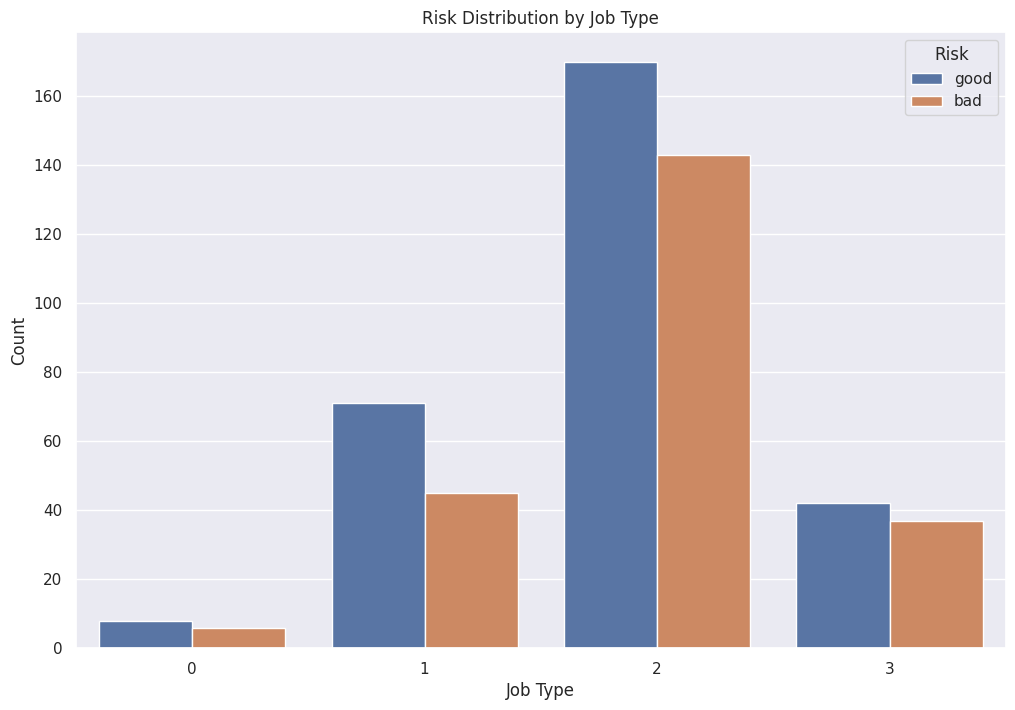

In [80]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Job', hue='Risk', data=df1)
plt.title('Risk Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

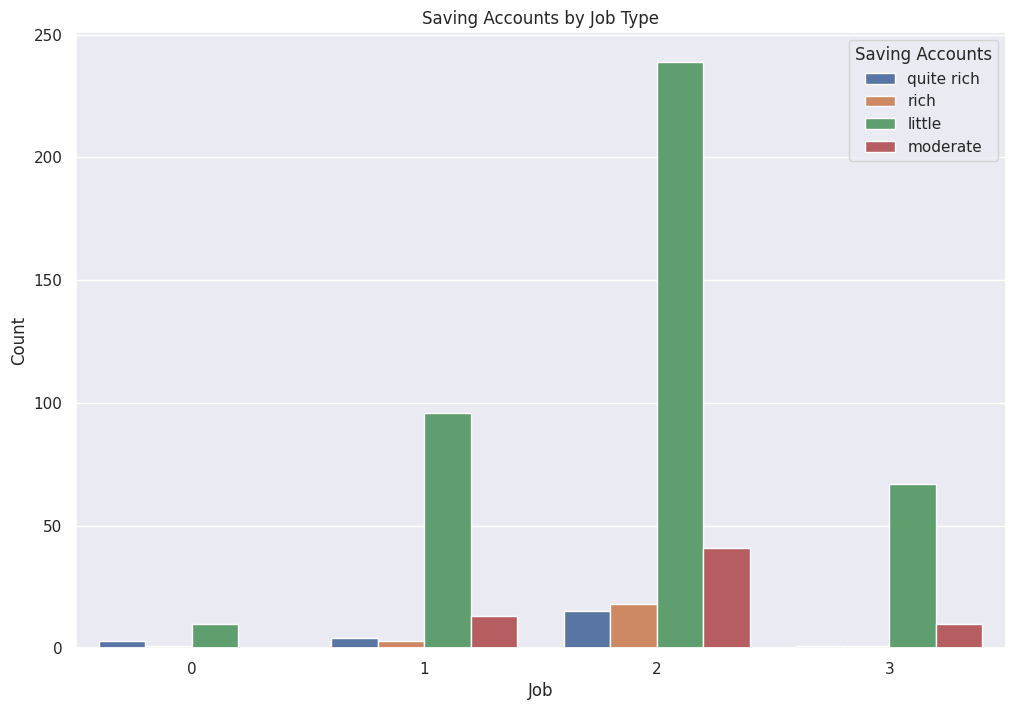

In [81]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Job', hue='Saving accounts', data=df1)
plt.title('Saving Accounts by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Saving Accounts')
plt.show()

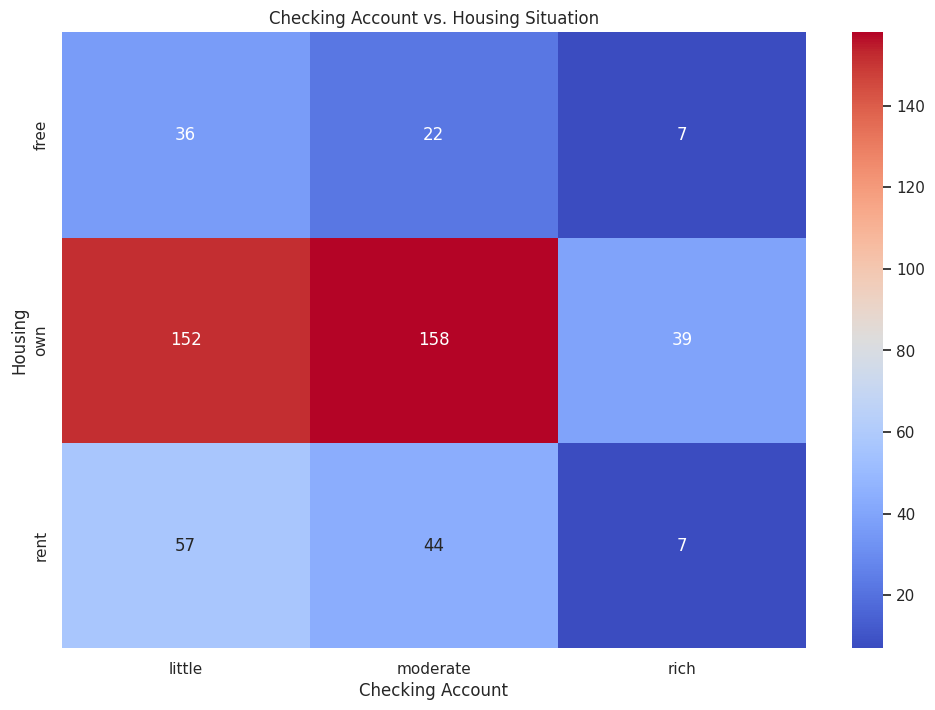

In [82]:
plt.figure(figsize=(12, 8))
cross_tab = pd.crosstab(df1['Housing'], df1['Checking account'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Checking Account vs. Housing Situation')
plt.xlabel('Checking Account')
plt.ylabel('Housing')
plt.show()

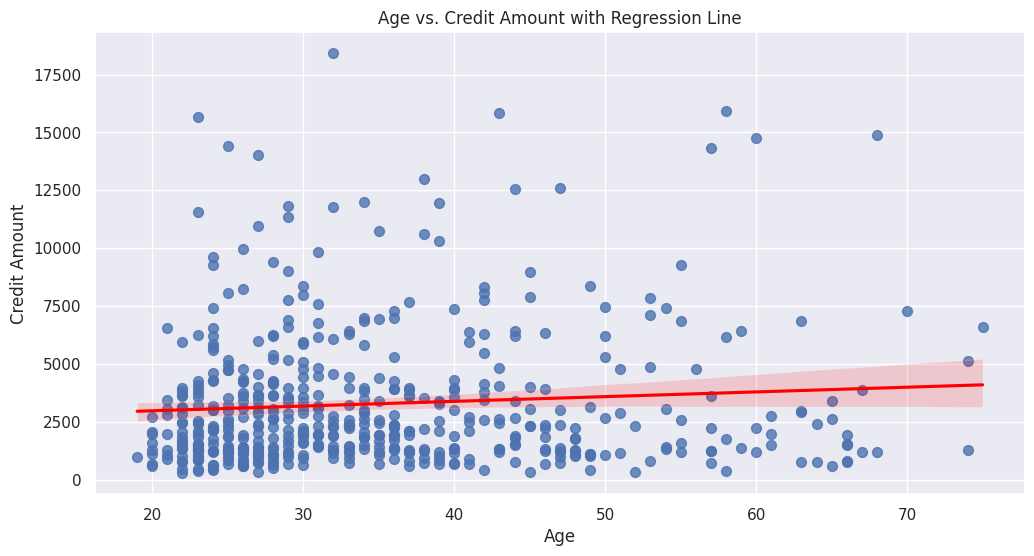

In [84]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Age', y='Credit amount', data=df1, scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Age vs. Credit Amount with Regression Line')
plt.xlabel('Age')
plt.ylabel('Credit Amount')
plt.show()